# A notebook to plot relative energies

This notebook is used for comparative analysis of different methods for 
calculating relative energies of molecular structures, from ASE databases, 
saved in ASE databases.

## Overview
- **Configuration**: Set up parameters such as file names, database information, and plot settings.
- **Process databases**: Process the databases and calculate relative energies.
- **Visualization**: Plot the relative energies for each method.
- **Main Execution**: Execute the script to plot the relative energies.


---

## Import modules

In [58]:
import matplotlib.pyplot as plt
from ase.db import connect

## Configuration
#### Set Parameters
Before running the analysis, set up the parameters below:

- `file_name`: Name of the output plot file.
- `databases_info`: Information about databases, including labels, colors, and linewidths.

In [59]:
file_name = "Method_comparison_all"

databases_info = [
    {
        "database": "scan_parallel_x_DFTB_GFN1_sp_alternative2_7_points.db",
        "label": "GFN1",
        "color": 'dodgerblue',
        "linewidth": None
    },
    {
        "database": "scan_parallel_x_DFTB_GFN2_sp_alternative2_7_points_from_GFN1.db",
        "label": "GFN2 from GFN1",
        "color": 'deepskyblue',
        "linewidth": None
    },
    {
        "database": "scan_parallel_x_DFTB_GFN2_sp_alternative2_7_points.db",
        "label": "GFN2",
        "color": 'darkred',
        "linewidth": None
    },
    {
        "database": "scan_parallel_x_DFTB_GFN1_sp_alternative2_7_points_from_GFN2.db",
        "label": "GFN1 from GFN2",
        "color": 'red',
        "linewidth": 0.5
    },
    {
        "database": "scan_parallel_x_gaussian_aug-cc-pvdz_sp_from_GFN2.db",
        "label": "B3LYP/aug-cc-PVDZ from GFN2",
        "color": 'purple',
        "linewidth": 0.5
    }
]

## Process Databases
#### Process the databases and calculate relative energies

No need to change anything in this block.

In [60]:
def calc_relative_energies(database, label):
    """Process a database and return relative energies."""
    db = connect(database)
    energies = [row.energy for row in db.select()]
    min_energy = min(energies)
    return [energy - min_energy for energy in energies], label

## Vizualisation

#### Plot the relative energies for each method

No need to change anything in this block.

In [61]:
def get_plot_config(file_name):
    """Return the configuration dictionary for plotting."""
    return {
        'xlabel': 'Structure index',
        'ylabel': 'Relative energy (eV)',
        'title': 'Relative energy vs. iteration step',
        'grid': True,
        'ylim': (0, 2),
        'plot_label': f'{file_name}.png',
        'colors': {},
        'linewidths': {}
    }
    
def save_plot(plot_label, dpi=300):
    """Save the plot with the given label."""
    plt.savefig(plot_label, dpi=dpi)
    plt.show()


def plot_relative_energies(all_relative_energies, labels, config):
    """Plot relative energies for each method."""
    plt.figure()
    for energies, label in zip(all_relative_energies, labels):
        plt.plot(energies, marker='o', linestyle='-', label=label, color=config['colors'][label], linewidth=config['linewidths'].get(label))
    plt.xlabel(config['xlabel'])
    plt.ylabel(config['ylabel'])
    plt.title(config['title'])
    plt.grid(config['grid'])
    plt.ylim(config['ylim'])
    plt.legend()
    save_plot(plot_label=config['plot_label'])

## Main execution

No need to change anything in this block.

#### Set plot configuration

In [62]:
config = get_plot_config(file_name)
for item in databases_info:
    label = item['label']
    config['colors'][label] = item['color']
    config['linewidths'][label] = item.get('linewidth', None)

#### Process databases

In [63]:
all_relative_energies = []
labels = []
for item in databases_info:
    relative_energies, plot_label = calc_relative_energies(item["database"], item["label"])
    all_relative_energies.append(relative_energies)
    labels.append(plot_label)

#### Plot the relative Energies

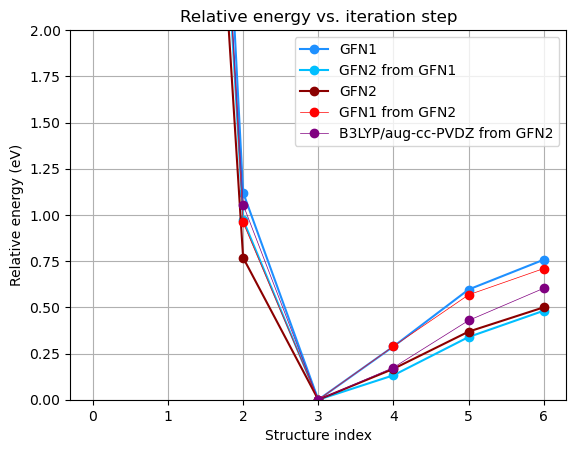

In [64]:
plot_relative_energies(all_relative_energies, labels, config)